In [1]:
import TCC_supercon_dados as tsd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import TCC_supercon_funcoes_apoio_ML as tsf

In [2]:
#Verificando a correlação das variáveis da base geral com a temperatura crítica
correlacao = pd.DataFrame(tsd.base_geral.corr())

#0.9 a 1 positivo ou negativo indica uma correlação muito forte.
#0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#0 a 0.3 positivo ou negativo indica uma correlação desprezível.

#Nível a partir:
nivel = 0.58

relevancia_corr = pd.DataFrame(correlacao['critical_temp'].loc[(correlacao['critical_temp']>=nivel ) | (correlacao['critical_temp']<=-nivel)])

In [3]:
# mapa_calor=pd.DataFrame(relevancia_corr,index=['numero_elementos','peso_entropia_massa_atomica','intervalo_afinidade_eletronica','desvio_afinidade_eletronica','peso_entropia_raio_atomico','intervalo_raio_atomico','desvio_raio_atomico','intervalo_condutividade_termica','desvio_condutividade_termica','desvio_ponderado_condutividade_termica','media_valencia','media_ponderada_valencia','media_geo_valencia','entropia_valencia','peso_entropia_valencia','temp_critica'])
# mapa_calor['critical_temp']=relevancia_corr['critical_temp']

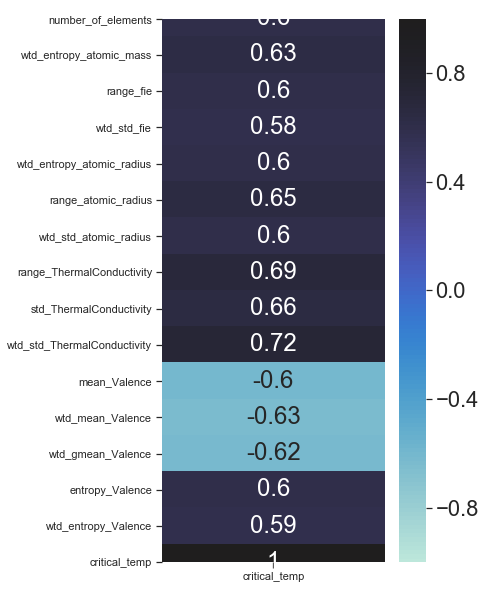

In [53]:
f, ax = plt.subplots(figsize=(5, 10))
sns.set(style="ticks")
sns.set(font_scale=2)
sns.heatmap(relevancia_corr,vmin=-1, vmax=1,center=1,annot=True, ax=ax)

In [5]:
colunas_importantes=['range_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'std_ThermalConductivity', 'range_atomic_radius', 'wtd_entropy_Valence',
       'wtd_entropy_atomic_mass', 'wtd_mean_Valence', 'wtd_gmean_Valence',
       'range_fie', 'wtd_gmean_ElectronAffinity', 'wtd_entropy_atomic_radius',
       'std_atomic_mass', 'wtd_mean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_std_ElectronAffinity']

In [6]:
X_importantes_pt_br = ['Intervalo de Condutividade Térmica [W/(mK)]', 'Desvio Ponderado da Condutividade Térmica [W/(mK)]', 'Desvio Padrão da Condutividade Térmica [W/(mK)]',
                             'Intervalo do Raio Atômico [pm]', 'Entropia Ponderada da Valência', 'Entropia Ponderada da Massa Atômica']

In [7]:
X_importantes = tsd.X_modelagem.loc[:,colunas_importantes]
Y=tsd.Y_modelagem

In [8]:
Y.describe()

count    21539.000000
mean        34.124146
std         34.191957
min          0.000210
25%          5.240000
50%         19.700000
75%         62.000000
max        185.000000
Name: critical_temp, dtype: float64

[-1, 200, 0, 0.03]

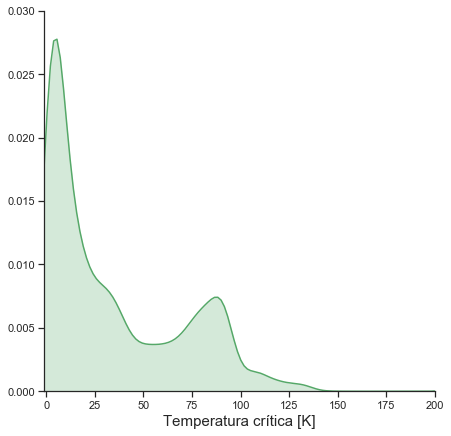

In [52]:
f, ax = plt.subplots(figsize=(7, 7), sharex=True)
sns.despine()
sns.set(style="ticks")
sns.distplot(Y, hist=False, color="g", kde_kws={"shade": True}, ax=ax)
plt.xticks(np.linspace(0, 200, 9, endpoint=True))
plt.xlabel('Temperatura crítica [K]',fontsize = 15)
plt.axis([-1,200,0,0.03])

Text(0, 0.5, 'N° de amostras')

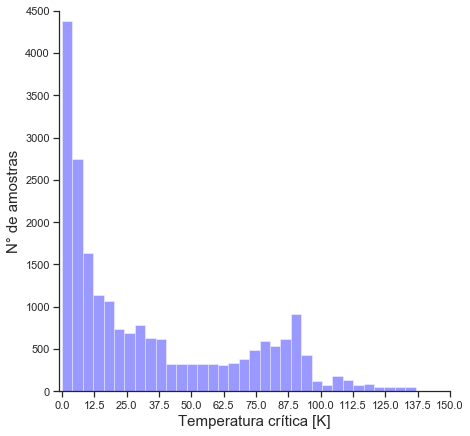

In [51]:
f, ax = plt.subplots(figsize=(7, 7), sharex=True)
sns.set(style="ticks")
sns.despine()

sns.distplot(Y, kde=False, color="blue", ax=ax)
plt.axis([-1,150,0,4500])
plt.xticks(np.linspace(0, 150, 13, endpoint=True))
plt.xlabel('Temperatura crítica [K]',fontsize = 15)
plt.ylabel('N° de amostras',fontsize = 15)

In [11]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

[0, 175, 0, 0.03]

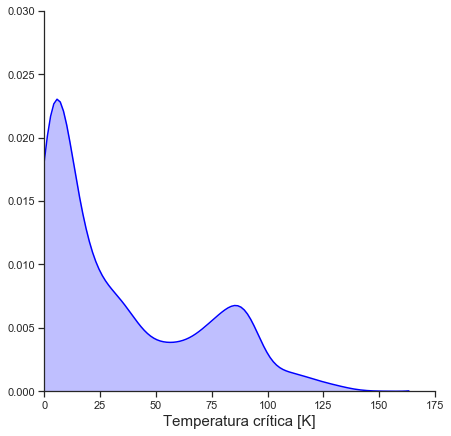

In [50]:
f, ax = plt.subplots(figsize=(7, 7))
sns.set(style="ticks")
sns.despine()
sns.distplot(Y_teste, hist=False, color="blue", kde_kws={"shade": True}, ax=ax)
plt.xticks(np.linspace(0, 175, 8, endpoint=True))
plt.xlabel('Temperatura crítica [K]',fontsize = 15)
plt.axis([0,175,0,0.03])

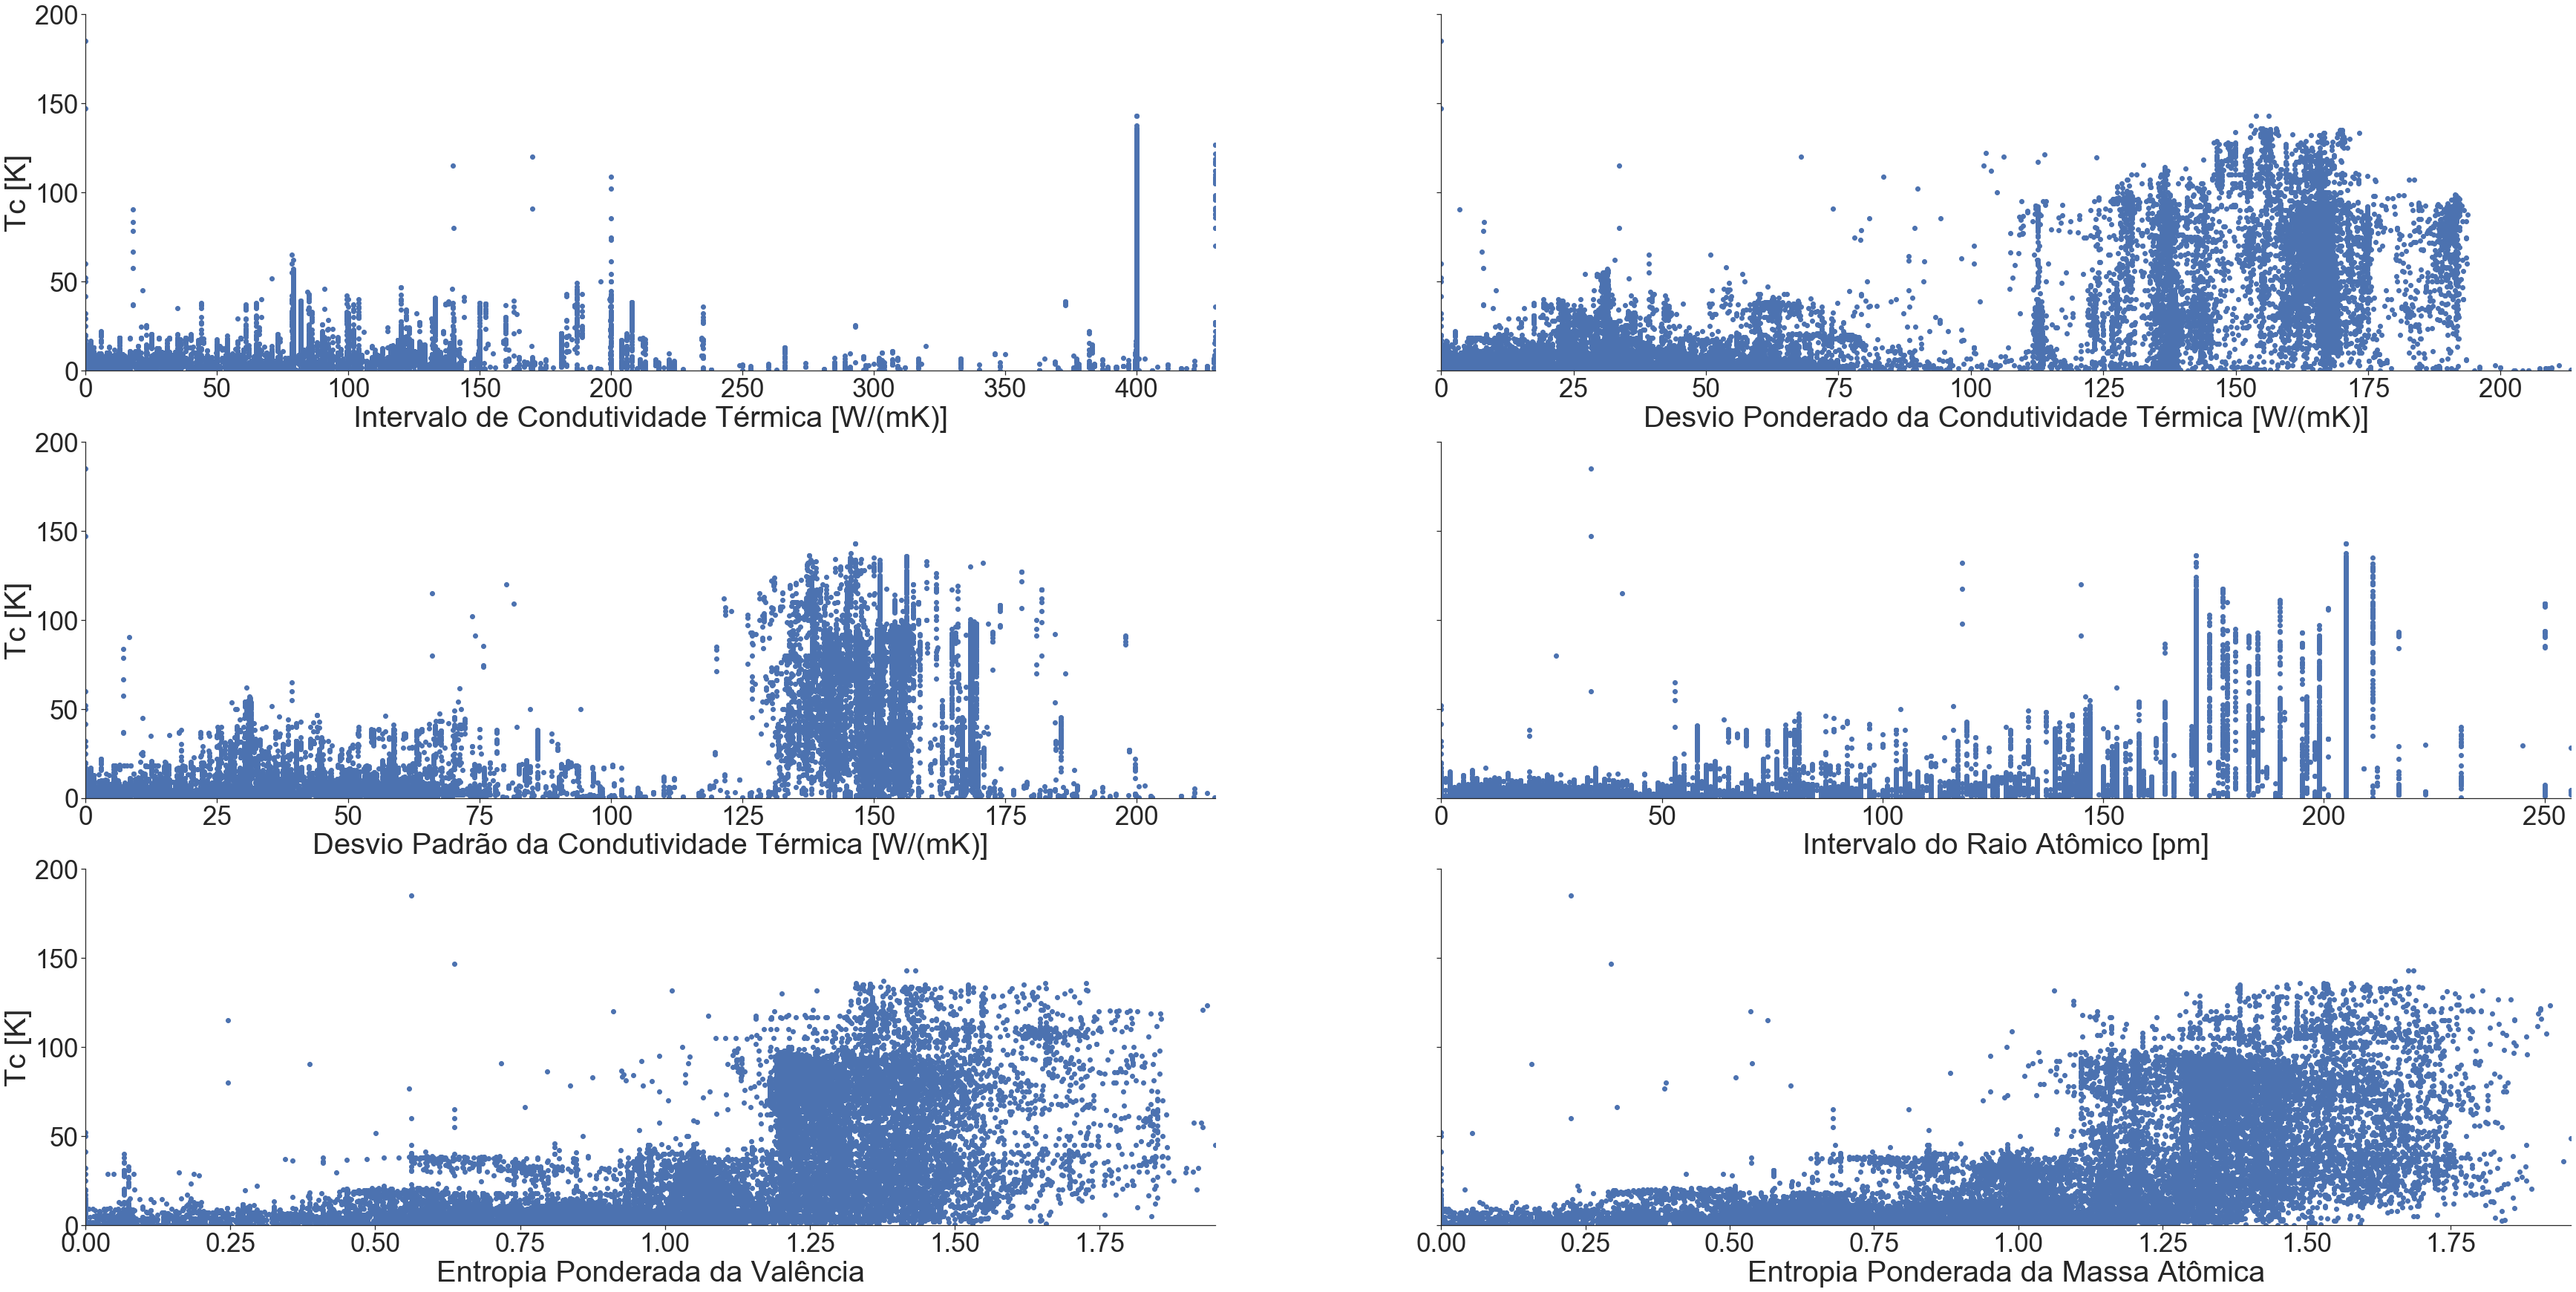

In [49]:
fig, axs = plt.subplots(3,2, figsize=(60,30), sharey=True)


sns.despine()

n=0


for i in range(3):
    
    for a in range(2):
        
        if a == 1:           
        

            # axs[i,a].set_title('Tc [K]  vs. ' + X_importantes_pt_br[n],fontdict={'size': 35})
            axs[i,a].plot(X_importantes.iloc[:,n], Y,'bo',label=X_importantes.columns[n])
            axs[i,a].tick_params(labelsize=35)
            #axs[i,a].set_ylabel('Tc [K]',fontsize = 40)
            axs[i,a].set_xlabel(X_importantes_pt_br[n],fontsize = 40)
            axs[i,a].axis([0,max(X_importantes.iloc[:,n]),0,200])
            # axs[i,a].legend()
            
        else:
            
            # axs[i,a].set_title('Tc [K]  vs. ' + X_importantes_pt_br[n],fontdict={'size': 35})
            axs[i,a].plot(X_importantes.iloc[:,n], Y,'bo',label=X_importantes.columns[n])
            axs[i,a].tick_params(labelsize=35)
            axs[i,a].set_ylabel('Tc [K]',fontsize = 40)
            axs[i,a].set_xlabel(X_importantes_pt_br[n],fontsize = 40)
            axs[i,a].axis([0,max(X_importantes.iloc[:,n]),0,200])
            # axs[i,a].legend()
            
            
        
        n+=1